In [19]:
import torch
import torchvision.models as models
import json
import requests

In [2]:
# Load the pre-trained AlexNet model
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 70.9MB/s]


In [3]:
# Set the model to evaluation mode
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [4]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
# Define the image transformation process
preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [6]:
img_path = 'catty.jpg'  # Replace with the path to your image
img = Image.open(img_path)


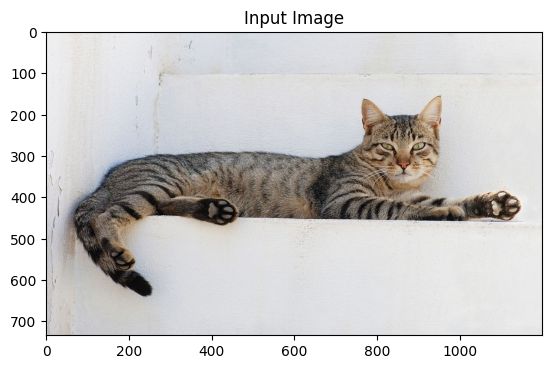

In [7]:
# Display the image
plt.imshow(img)
plt.title("Input Image")
plt.show()



In [8]:
# Preprocess the image
img_tensor = preprocess(img)


In [9]:
# Add a batch dimension
img_tensor = img_tensor.unsqueeze(0)


In [10]:
# Perform the prediction
with torch.no_grad():
    output = alexnet(img_tensor)


In [11]:
# Convert these to probabilities
probabilities = torch.nn.functional.softmax(output[0], dim=0)


In [12]:
# Get the top 5 predictions
top5_prob, top5_catid = torch.topk(probabilities, 5)


In [20]:
# Load the ImageNet labels from the URL
url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
response = requests.get(url)
labels = json.loads(response.text)


In [21]:
# Display the predictions
for i in range(top5_prob.size(0)):
    print(f"{labels[top5_catid[i]]}: {top5_prob[i].item():.4f}")


tabby cat: 0.7928
Egyptian Mau: 0.1281
tiger cat: 0.0665
lynx: 0.0086
tiger: 0.0018


In [22]:
import glob
# Test the model with multiple images
image_paths = glob.glob('catty.jpg')  # Replace with your folder path


In [23]:
for img_path in image_paths:
    img = Image.open(img_path)
    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0)

    with torch.no_grad():
        output = alexnet(img_tensor)

    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    top5_prob, top5_catid = torch.topk(probabilities, 5)

    print(f"Predictions for {img_path}:")
    for i in range(top5_prob.size(0)):
        print(f"  {labels[top5_catid[i]]}: {top5_prob[i].item():.4f}")
    print()


Predictions for catty.jpg:
  tabby cat: 0.7928
  Egyptian Mau: 0.1281
  tiger cat: 0.0665
  lynx: 0.0086
  tiger: 0.0018

